## Personal data protection

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'\insurance.csv')

In [3]:
df.head(2)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [6]:
def unique_values(df):
    for column in df.columns:
        print(f'Unique values of {column} column')
        print(df[column].unique())

In [7]:
unique_values(df)

Unique values of Пол column
[1 0]
Unique values of Возраст column
[41. 46. 29. 21. 28. 43. 39. 25. 36. 32. 38. 23. 40. 34. 26. 42. 27. 33.
 47. 30. 19. 31. 22. 20. 24. 18. 37. 48. 45. 44. 52. 49. 35. 56. 65. 55.
 57. 54. 50. 53. 51. 58. 59. 60. 61. 62.]
Unique values of Зарплата column
[49600. 38000. 21000. 41700. 26100. 41000. 39700. 38600. 49700. 51700.
 36600. 29300. 39500. 55000. 43700. 23300. 48900. 33200. 36900. 43500.
 36100. 26600. 48700. 40400. 38400. 34600. 34800. 36800. 42200. 46300.
 30300. 51000. 28100. 64800. 30400. 45300. 38300. 49500. 19400. 40200.
 31700. 69200. 33100. 31600. 34500. 38700. 39600. 42400. 34900. 30500.
 24200. 49900. 14300. 47000. 44800. 43800. 42700. 35400. 57200. 29600.
 37400. 48100. 33700. 61800. 39400. 15600. 52600. 37600. 52500. 32700.
 51600. 60900. 41800. 47400. 26500. 45900. 35700. 34300. 26700. 25700.
 33300. 31100. 31500. 42100. 37300. 42500. 27300. 46800. 33500. 44300.
 41600. 53900. 40100. 44600. 45000. 32000. 38200. 33000. 38500. 51800.
 33

Looks like a clean df so long. No signs of anomalies and every cell is filled.

In [8]:
def to_int(df):
    for column in df.columns:
        if df[column].min() >= np.iinfo(np.int8).min and df[column].max() <= np.iinfo(np.int8).max:
            df[column] = df[column].astype(np.int8)
        else:
            df[column] = df[column].astype('int32')
to_int(df)
df.info()        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                5000 non-null   int8 
 1   Возраст            5000 non-null   int8 
 2   Зарплата           5000 non-null   int32
 3   Члены семьи        5000 non-null   int8 
 4   Страховые выплаты  5000 non-null   int8 
dtypes: int32(1), int8(4)
memory usage: 39.2 KB


This function helped us to reduce the size of DataFrame from `195.4 KB` to `39.2 KB` which will help us to reduce the amount of calculations needed

In [9]:
print(df.duplicated().sum())
df = df.drop_duplicates()
df.duplicated().sum()

153


0

     proportion
Пол            
0      0.501547
1      0.498453


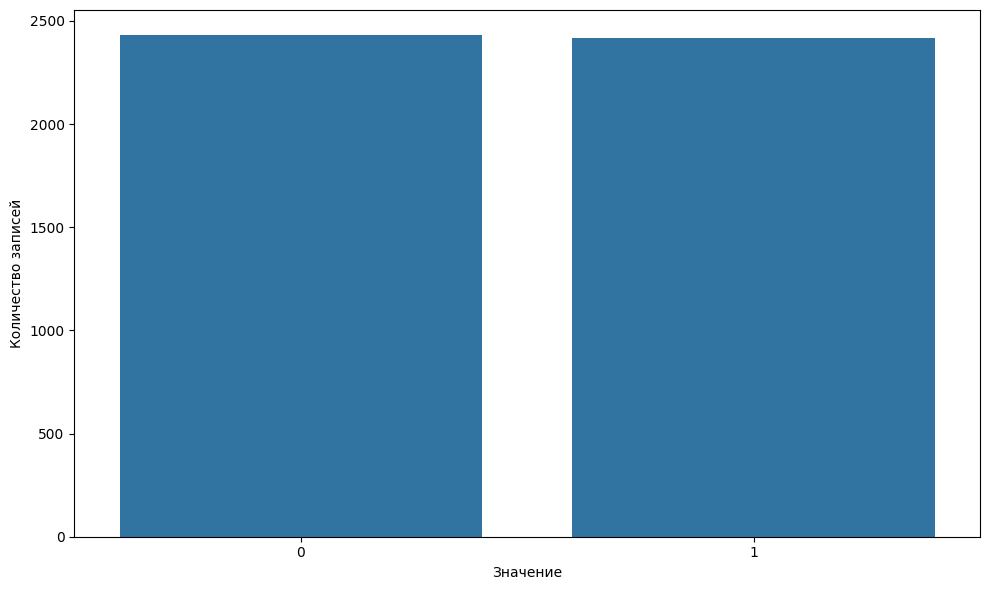

         proportion
Возраст            
19         0.043945
25         0.042294
31         0.041675
26         0.041469
22         0.041469
27         0.041469
29         0.040437
28         0.040437
30         0.040437
32         0.040437
23         0.040231
21         0.039818
20         0.039200
36         0.038374
33         0.038374
24         0.036311
34         0.035692
35         0.035692
37         0.029503
39         0.028884
38         0.027852
41         0.025583
18         0.023932
40         0.022694
42         0.019187
43         0.015886
44         0.015267
45         0.015061
46         0.012379
47         0.009697
49         0.007634
50         0.005364
48         0.005364
52         0.004539
51         0.004333
53         0.002269
55         0.001857
54         0.001444
56         0.001032
59         0.000619
57         0.000413
58         0.000413
60         0.000413
61         0.000206
65         0.000206
62         0.000206


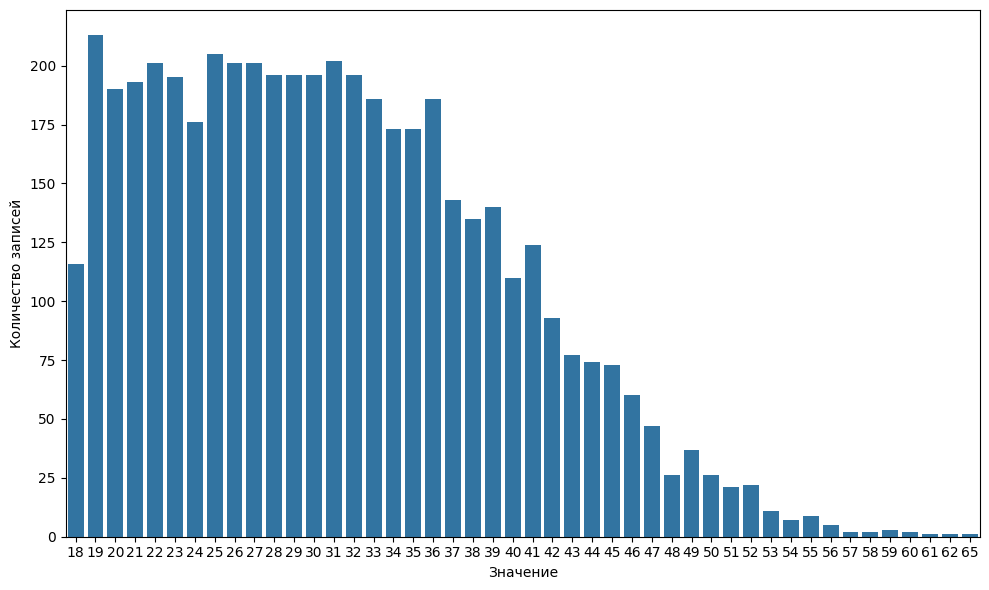

          proportion
Зарплата            
45800       0.005777
37100       0.005570
38800       0.005364
32800       0.005364
40500       0.005158
...              ...
17700       0.000206
70600       0.000206
18100       0.000206
13000       0.000206
56800       0.000206

[524 rows x 1 columns]


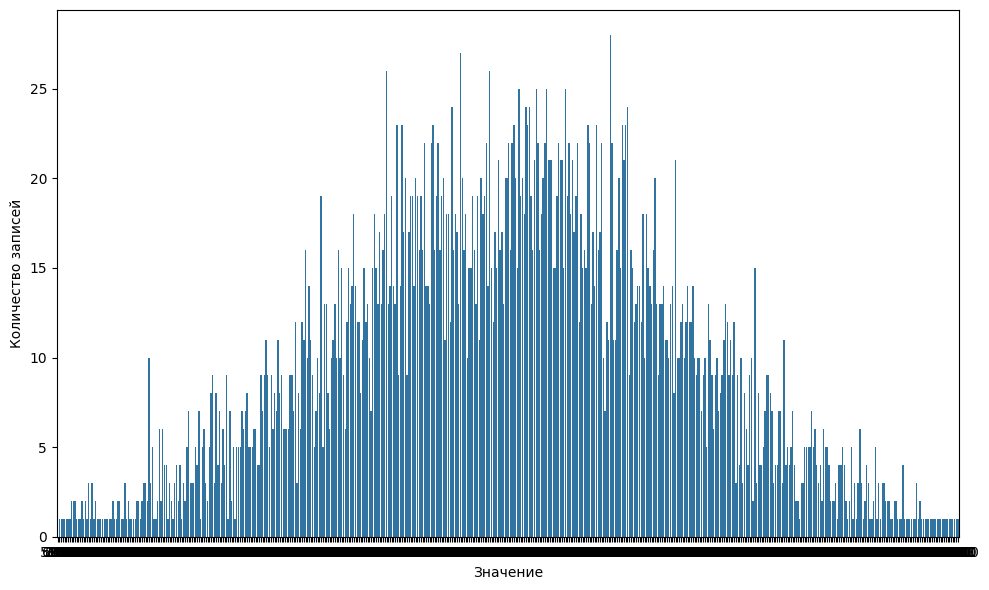

             proportion
Члены семьи            
1              0.360635
0              0.301424
2              0.214153
3              0.090159
4              0.025583
5              0.006602
6              0.001444


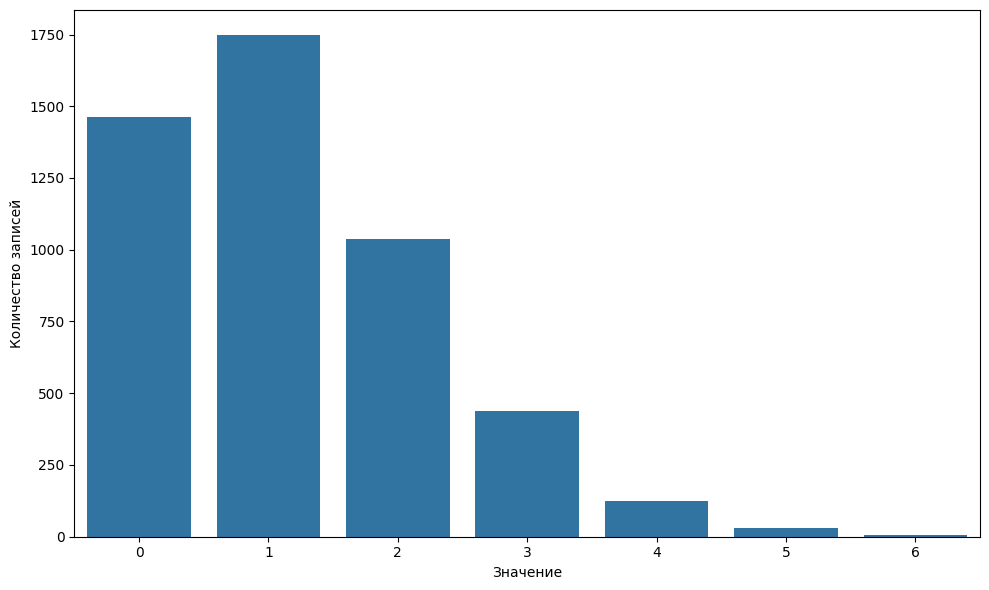

                   proportion
Страховые выплаты            
0                    0.883846
1                    0.087270
2                    0.023520
3                    0.003714
4                    0.001444
5                    0.000206


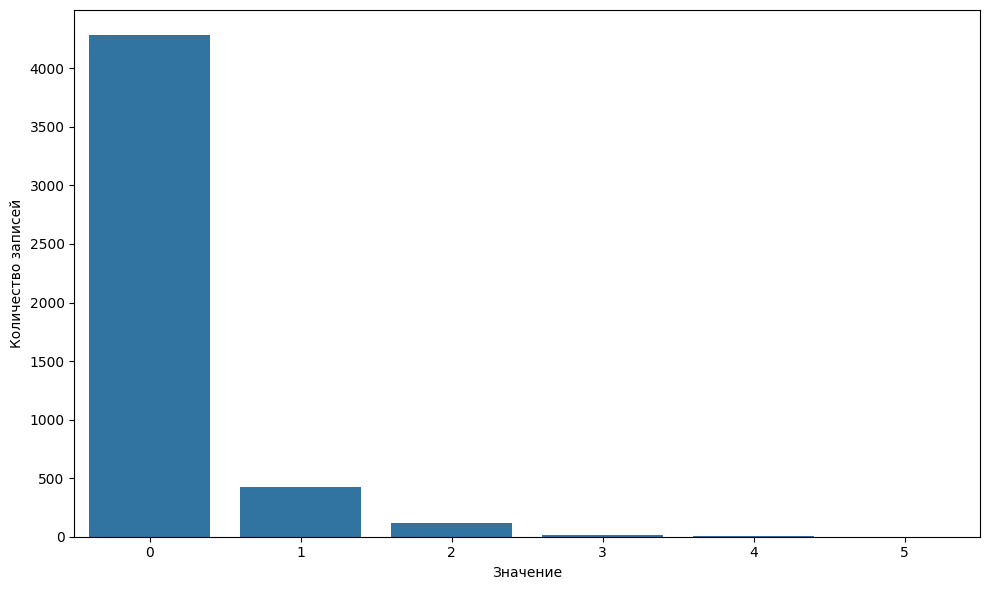

In [10]:
for column in df.columns:
    print(df[column].value_counts(normalize=True).to_frame())
    plt.figure(figsize=(10, 6))
    count = sns.countplot(data=df, x=column)
    count.set(
        xlabel = 'Значение',
        ylabel = 'Количество записей'
    )
    plt.tight_layout()
    plt.show()

We can see from the start that target variable `Страховые выплаты` is imblanced as most of the clients never receive them. That should be taken into consideration. It would be correct to try to find a correlation between `Страховые выплаты` and one of the columns in the data.

After getting the initial graphs let's do a bit more thorough plotting

Let's look first at the salary distribution

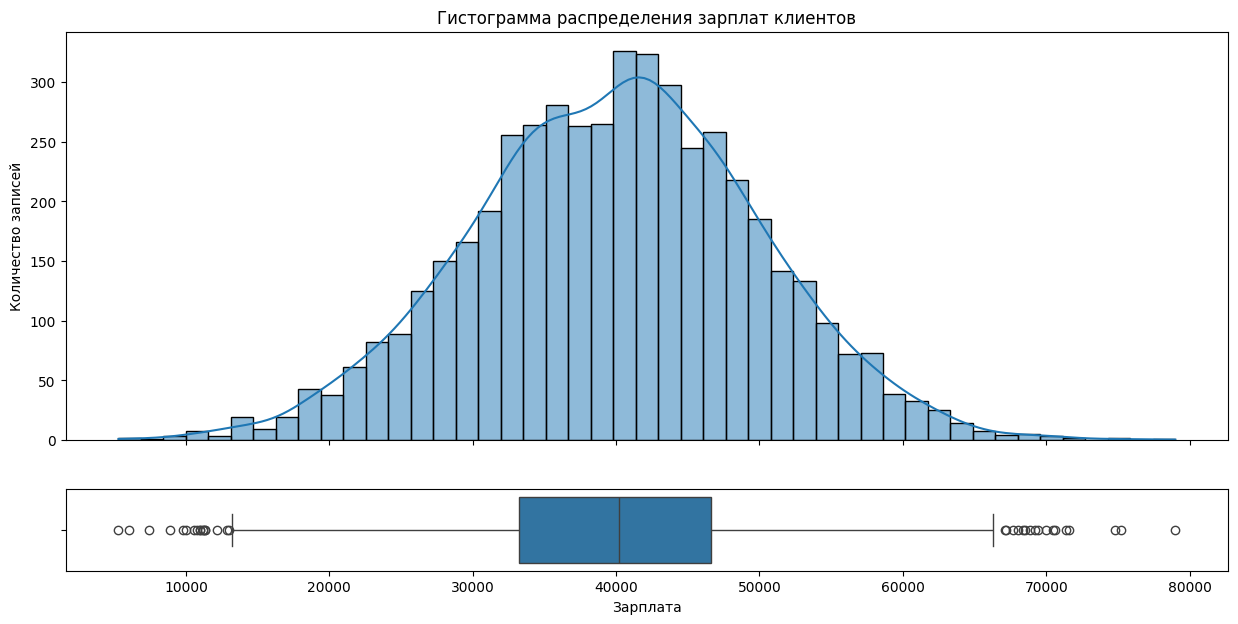

In [11]:
_, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 7), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[5,1]))
hist = sns.histplot(data=df, x='Зарплата', kde=True, ax=axs_hist)
box = sns.boxplot(data=df, x='Зарплата', orient='h', ax=axs_box)
hist.set(title='Гистограмма распределения зарплат клиентов',
         ylabel='Количество записей');

Salary amounts look like a normal distribution

Let's look at `Salary` distribution by `Age`

[Text(0.5, 1.0, 'Диаграмма рассеяния для зависимости зарплаты от возраста клиента')]

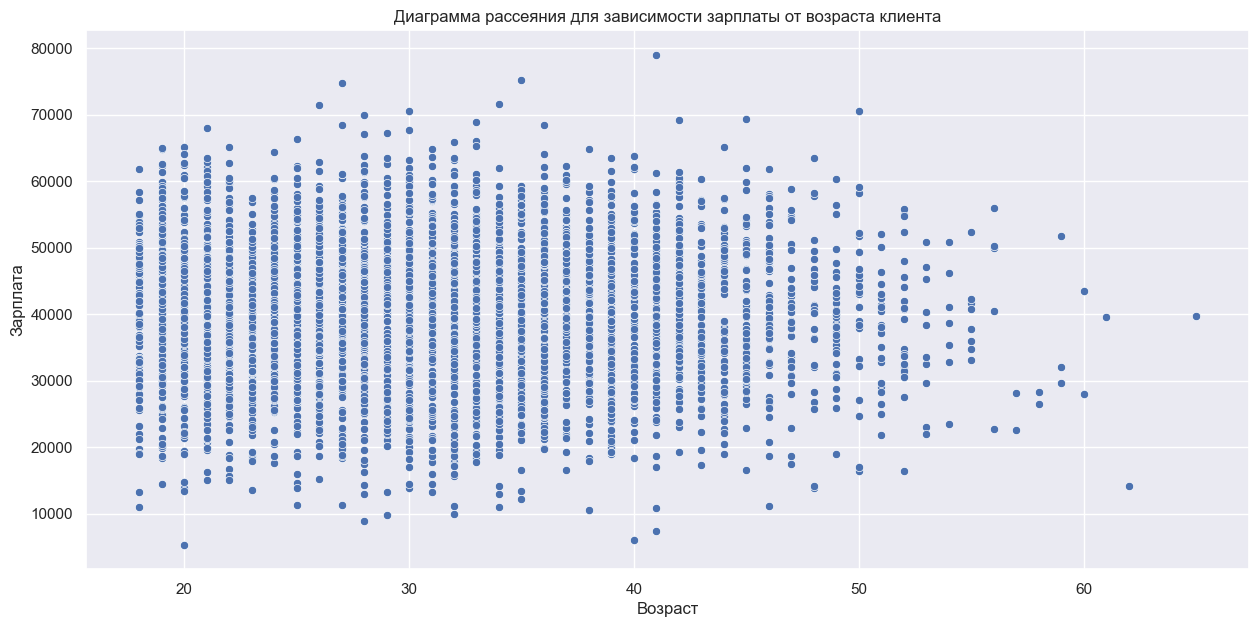

In [12]:
sns.set_theme(style='darkgrid')
sns.set(rc={"figure.figsize":(15, 7)})
sns.scatterplot(data=df, x='Возраст', y='Зарплата').set(
    title='Диаграмма рассеяния для зависимости зарплаты от возраста клиента')

That looks a bit odd, because there is no obvious positive correlation between `Age` and `Salary`

Let us see the correlation between columns.

                        Пол   Возраст  Зарплата  Члены семьи  \
Пол                1.000000  0.001953  0.015456    -0.007315   
Возраст            0.001953  1.000000 -0.017386    -0.009064   
Зарплата           0.015456 -0.017386  1.000000    -0.031687   
Члены семьи       -0.007315 -0.009064 -0.031687     1.000000   
Страховые выплаты  0.011565  0.654964 -0.013123    -0.039303   

                   Страховые выплаты  
Пол                         0.011565  
Возраст                     0.654964  
Зарплата                   -0.013123  
Члены семьи                -0.039303  
Страховые выплаты           1.000000  


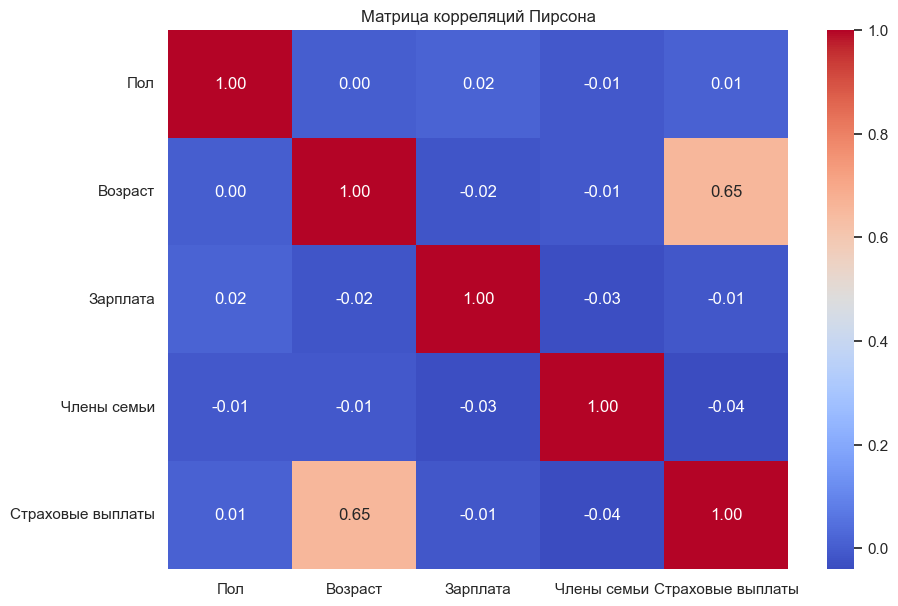

In [13]:
correlation = df.corr()
print(correlation)

# Visualize the correlation heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(
    correlation, 
    annot=True,  # Show numerical values in cells
    cmap='coolwarm',  # Color scheme
    fmt='.2f'  # Format to 2 decimal places
)
plt.title('Матрица корреляций Пирсона')
plt.show()

As we can see there is a strong positive correlation между Возрастом и получением человеком страховых выплат. Let's try to see the phik correlation matrix.

interval columns not set, guessing: ['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты']


<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Александр\AppData\Local\Temp\ipykernel_12564\1140801674.py:10: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Матрица корреляций $\phi_K$ ')


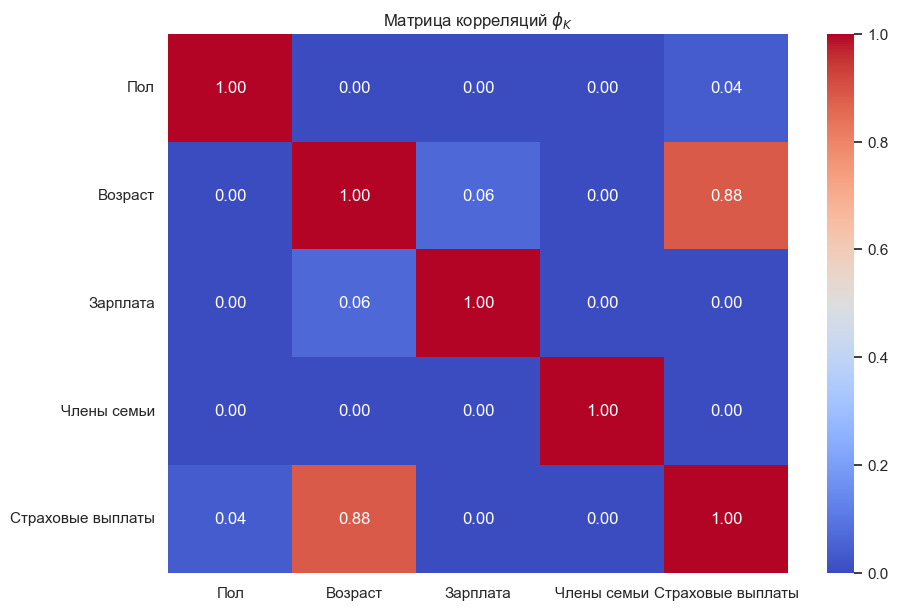

In [14]:
import phik
phik = df.phik_matrix()
plt.figure(figsize=(10, 7))
sns.heatmap(
    phik, 
    annot=True,  # Show numerical values in cells
    cmap='coolwarm',  # Color scheme
    fmt='.2f'  # Format to 2 decimal places
)
plt.title('Матрица корреляций $\phi_K$ ')
plt.show()

Summary on the initial assumptions:
* Obvious duplicated data have been removed 
* Data types of dataframe has been converted to more compact one to reduce the amount of needed calculation 
* Clients Age distributes in range 18-65 with the mean value of 30.
* There is almost equal amount of both genders represented in the table.
* `Avg` client salary is 40k with `std` almost 10k
* Most of the clients don't receive insurance payouts and those who get it tends to be more aged with significant positive correlation.

## 2. Hypotheses and solutions

### 2.1.  Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?
В соответствии с поставленной задачей нам нужно ответить на вопрос: изменится ли качество линейной регрессии, если признаки умножить на обратимую матрицу.

Введём несколько обозначений:

 $X$ — матрица признаков (нулевой столбец состоит из единиц)

 $y$ — вектор целевого признака

 $P$ — матрица, на которую умножаются признаки
    
 $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)
Предсказания:
$$
a=Xw
$$
Задача обучения - сведение `MSE` к минимуму:
$$
w = \underset{w}{arg min} MSE(Xw, y)
$$
Минимальное значение `MSE` получается, когда веса равны этой величине:
$$
w = (X^{T}X)^{-1}X^{T}y
$$


#### Argument:


Let's consider $a_1$ as `predictions` of `LinearRegression` for features matrix $X$. And $a_2$ as prediction for features matrix $X$ multiplied by inverse matrix $P$. We are supposed to prove that $a_1=a_2$. If $w_2$ is weight vector of $X*P$ matrix and $w_1$ is weight vector of $X$ matrix then:
$$
a_1=X\times w_1
$$
$$
a_2=X\times P\times w_2
$$
Weight vector $w_1$ of features matrix $X$ in order to find min `MSE` is calculated by this formula:
$$
w_1 = (X^{T}\times X)^{-1}\times X^{T}\times y
$$
Weight vector $w_2$ of features matrix $X\times P$ in order to find min `MSE` is calculated by this formula:
$$
w_2 = ((X\times P)^{T}\times X\times P)^{-1}\times (X\times P)^{T}\times y
$$
Combined weight and prediction formulas look like this:
* for $a_1$
$$
a_1 = X\times (X^{T}\times X)^{-1}\times X^{T}\times y
$$
* for $a_2$:
$$
a_2 = X\times P\times ((X\times P)^{T}\times X\times P)^{-1}\times (X\times P)^{T}\times y
$$ 
Let's prove the assumption that $a_1 = a_2$:
$$
X\times (X^{T}\times X)^{-1}\times X^{T}\times y = X\times P\times ((X\times P)^{T}\times X\times P)^{-1}\times (X\times P)^{T}\times y
$$

Let's recall properties of inverse matrices:
$$
(A\times B)^{-1} = B^{-1}\times A^{-1}
$$
$$
(A^{T})^{-1} = (A^{-1})^{T} 
$$
$$
(A\times B)^{T} = B^{T}\times A^{T}
$$
and finally for and identity matrix:
$$
A\times A^{-1} = E
$$
where $E$ is identity matrix. Any matrix being multipled by identity matrix will result in the same matrix $A\times E = E\times A = A$
Considering this properties our equasion can be changed to this:

$$
X\times (X^{T}\times X)^{-1}\times X^{T}\times y = X\times P\times (X^{T}\times P^{T}\times X\times P)^{-1}\times (X\times P)^{T}\times y
$$
Let's combine both sides to the same  $(X^{T}\times X)^{-1}\times X^{T} $ structure:


$$
X\times(X^{T}\times X)^{-1}\times X^{T}\times y = X\times (X^{T}\times X)^{-1} \times y \times((P\times P^{-1})\times ((P^{T})^{-1}\times P^{T})\times X^{T})
$$ 

$$
X\times(X^{T}\times X)^{-1}\times X^{T}\times y = X\times (X^{T}\times X)^{-1} \times y \times(X^{T}\times E\times E)
$$ 
$$
a_1=a_2
$$

As we can clearly see now multiplying feature matrix by inverse matrix will not result in any changes regrading the output of linear regression

### 2.2. Data protection

For the purpose of dat aprotection we will multiply feature matrix $X$ by inverse matrix $P$, which will be generated randomly. The following algorith:
* Test the output of `LinearRegression` on matrix `X`;
* Generate random $P$ matrix;
* Test if matrix $P$ can be inversed;
* Multiply feature matrix $X$ by random inversed matrix $P$ $Z=X\times P$;
* Test the output of `LinearRegression` on new encrypted matrix $Z$.
#### 2.2.1. Hypothesis in action.

In [15]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

In [16]:
lr = LinearRegression()
lr.fit(features,target)
raw_predictions = lr.score(features, target)
print(raw_predictions)

0.4302010046633359


Now we need to program a data encryptor for the test purposes

In [17]:
def data_encryptor(features):
    n = features.shape[1]
    np.random.seed(333)  # For reproducibility
    coding_matrix = np.random.randint(1, 1000, (n, n))
    det = np.linalg.det(coding_matrix)
    if det != 0:
        encrypted_features = np.dot(features, coding_matrix)
        return encrypted_features, np.linalg.inv(coding_matrix)
    else:
        raise ValueError("Coding matrix is not invertible")

encrypted_features, decryption_matrix = data_encryptor(features)
encrypted_features = pd.DataFrame(encrypted_features, columns=features.columns)

lr.fit(encrypted_features, target)
modified_score = lr.score(encrypted_features, target)
print(f"Encrypted R² score: {modified_score}")

Encrypted R² score: 0.4302010046633371


In [18]:
encrypted_features, coding_matrix= data_encryptor(features)
encrypted_features = pd.DataFrame(encrypted_features, columns = features.columns)

In [19]:
display(encrypted_features.head())

,Пол,Возраст,Зарплата,Члены семьи
0,23229105,14202516,3573830,20256110
1,17801359,10885817,2738445,15524587
2,9838643,6016875,1513363,8580905
3,19524261,11935209,3003953,17023179
4,12225857,7476074,1880936,10662208


In [22]:
diff = raw_predictions - modified_score
print("Difference in R^2 scores: ", diff)

Difference in R^2 scores:  -1.2212453270876722e-15


In [101]:
def test_encryption_performance(X, y, iterations=1000):
    original_scores = []
    modified_scores = []
    np.random.seed(0)
    for i in range(iterations):
        encrypted_X, _ = data_encryptor(X)
        encrypted_X = pd.DataFrame(encrypted_X, columns=X.columns)
        
        lr_orig = LinearRegression()
        lr_orig.fit(X, y)
        lr_enc = LinearRegression()
        lr_enc.fit(encrypted_X, y)
        
        original_scores.append(lr_orig.score(X, y))
        modified_scores.append(lr_enc.score(encrypted_X, y))
    
    t_stat, p_val = stats.ttest_rel(original_scores, modified_scores)
    return original_scores, modified_scores, t_stat, p_val

ori, mod, t, p = test_encryption_performance(features, target, iterations=1000)
print(f"t-statistic: {t}, p-value: {p}")

t-statistic: -inf, p-value: 0.0


As we can see in encryption performance there is no any statisticly significant difference between the result of `R2_scores` of `LinearRegression`  between encrypted and non-encrypted features

#### 2.2.2. Raising the r2_score of LinearRegression

In [45]:
features_train, features_test, target_train, target_test = train_test_split(
    features,
    target,
    test_size=0.25,
    random_state=333
)

In [98]:
pipeline_full = Pipeline([
    ("standard_scaller", StandardScaler()),
    ("select_features", SelectKBest(k=7)),
    ("poly_features", PolynomialFeatures(degree=2)),
    ("ridge_regression", Ridge())  # Combine regularization with other steps
])
param_grid_full = {
    "select_features__k": [5, 7, 10, 15],
    "poly_features__degree": [1, 2, 3, 4],
    "ridge_regression__alpha": [1, 1e-1, 1e-2, 1e-3, 1e-5, 1e-4, 1e-6, 10, 100]
}

grid_search = GridSearchCV(pipeline_full, param_grid_full, cv=5)
grid_search.fit(features_train, target_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(features_test)

In [99]:
r2_best = r2_score(target_test, y_pred)
print(f"Best R2: {r2_best}")
print("Best parameters:", grid_search.best_params_)

Best R2: 0.9090864084058026
Best parameters: {'poly_features__degree': 4, 'ridge_regression__alpha': 1e-06, 'select_features__k': 5}


So far we have reached the best R2 more than twice higher than initial 

Let's find the best result on encrypted data 

In [84]:
features_train_encrypted, features_test_encrypted, target_train, target_test = train_test_split(
    encrypted_features,
    target,
    test_size=0.25,
    random_state=333
)

In [96]:
grid_search = GridSearchCV(pipeline_full, param_grid_full, cv=5)
grid_search.fit(features_train_encrypted, target_train)
best_model = grid_search.best_estimator_

In [97]:
y_pred = best_model.predict(features_test_encrypted)
r2_best = r2_score(target_test, y_pred)
print(f"Best R2: {r2_best}")
print("Best parameters:", grid_search.best_params_)

Best R2: 0.4314743837538083
Best parameters: {'poly_features__degree': 1, 'ridge_regression__alpha': 1e-05, 'select_features__k': 5}


For some reason hyperparameter tuning bring us significantly different results which is unclear to me